

```
# Tiene formato de código
```

##Laboratorio 5
Integrantes: **Juan Sebastian Sanchez, Nicolas Morales Galindo**
            **Javier Valderrama, Julian Cifuentes**
            
Analisis de sentimientos en base a el contenido de las noticias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pysentimiento
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Carga del archivo Excel
noticias = pd.read_excel('/content/drive/MyDrive/Seminario/Sentiments/Noticias2ver.xlsx')



# Extracción de la columna 'contenido'
contenido = noticias['contenido'].dropna()  # Elimina filas sin datos

# Limpieza de texto
import re
from nltk.corpus import stopwords

def limpiar_texto(texto):
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\@w+|\#','', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = " ".join(word for word in texto.split() if word not in stopwords.words('spanish'))
    return texto

# Aplicar la función de limpieza a cada texto
noticias['contenido_limpio'] = contenido.apply(limpiar_texto)
contenido_limpio = contenido.apply(limpiar_texto)


   Columna1                                             Título  \
0         0  ¿Cómo potencializar las ventas de un emprendim...   
1         1  Así apoyará Corea del Sur al país para enfrent...   
2         2  Nanotecnología, una receta para cultivos más s...   
3         3  Desorden de padres, causa de nueva jornada de ...   
4         4  Senado, citado para el 13 de abril, cuando ter...   

                                                info  \
0  La época de crisis de salud por coronavirus es...   
1  El Presidente aseguró que ya le han devuelto e...   
2  Los resultados están acompañados del llamado d...   
3  Secretaría de Educación insiste en que se lleg...   
4  Así lo anunció el presidente del Senado, Lidio...   

                                           contenido                Tipo  
0  En medio de la coyuntura ocasionada por la pro...            economia  
1  Este jueves, en el noveno día de cuarentena na...  Politica y Opinion  
2  Jenny Prieto y Álex Caro son una parej

In [ ]:

from pysentimiento import create_analyzer
import transformers

transformers.logging.set_verbosity(transformers.logging.ERROR)






In [ ]:
print(contenido_limpio.head())
#sentimientoss = contenido_limpio.head().apply(lambda x: analyzer.predict(x).output)
#print(sentimientoss)
# Convertir la Serie a DataFrame
#df = pd.DataFrame(sentimientoss)

# Mostrar el DataFrame como tabla usando display()
#display(df)

0    En medio coyuntura ocasionada propagación coro...
1    Este jueves noveno día cuarentena nacional pre...
2    Jenny Prieto Álex Caro pareja cultivadores Jen...
3    Aunque Secretaría Educación recomendó padres f...
4    El presidente Congreso Lidio García anunció pr...
Name: contenido, dtype: object


,contenido
0,NEG
1,NEU
2,NEU
3,NEU
4,NEU
...,...
970,NEU
971,NEU
972,NEU
973,NEU


CPU times: user 9min 16s, sys: 1.04 s, total: 9min 17s
Wall time: 9min 46s


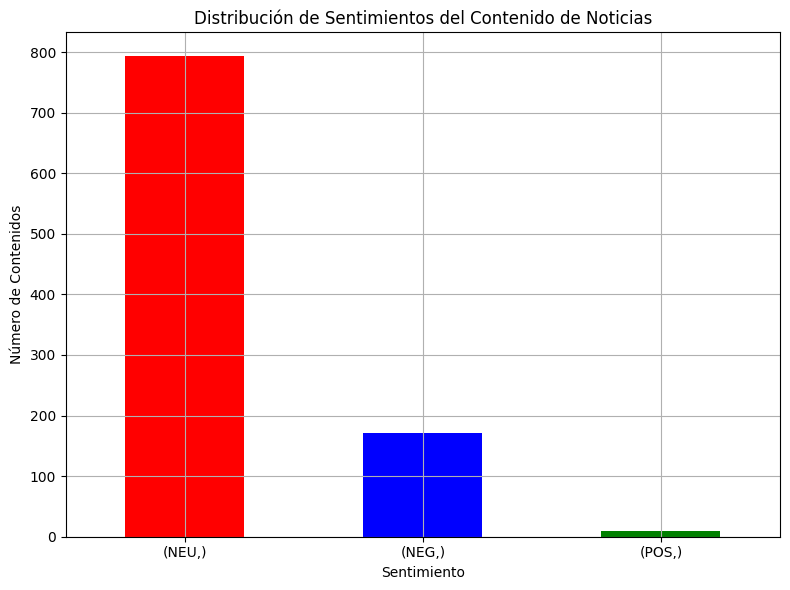

In [ ]:


%%time
import pandas as pd
import matplotlib.pyplot as plt

analyzer = create_analyzer(task="sentiment", lang="es")
sentimientos = contenido_limpio.apply(lambda x: analyzer.predict(x).output)

# Convertir la Serie a DataFrame
df = pd.DataFrame(sentimientos)

# Mostrar el DataFrame como tabla usando display()
display(df)

# Contar las frecuencias de cada categoría
conteo_sentimientos = df.value_counts()

# Preparar el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['red', 'blue', 'green'])

# Configuraciones del gráfico
plt.title('Distribución de Sentimientos del Contenido de Noticias')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Contenidos')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.grid(True)
plt.tight_layout()

Analisis de emociones y batch

```
# Tiene formato de código
```




,contenido
0,others
1,others
2,others
3,others
4,others
5,others
6,others
7,disgust
8,others
9,others


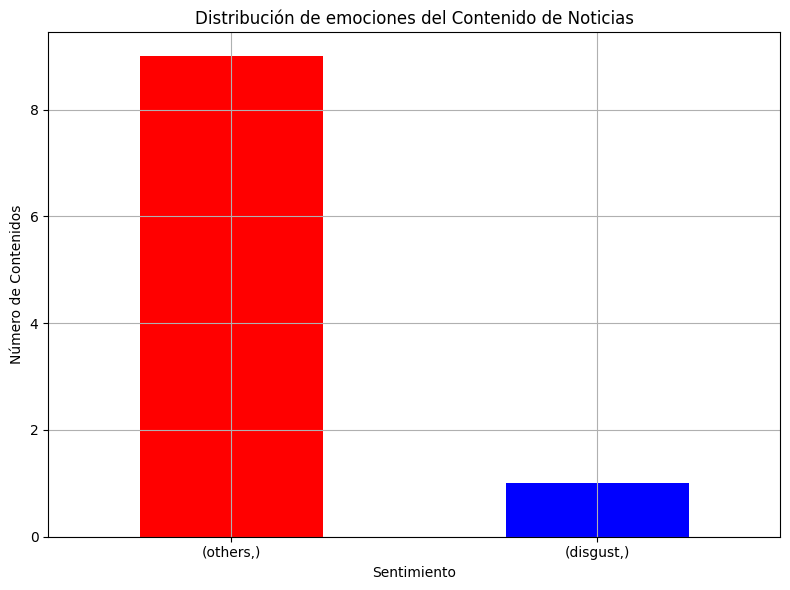

In [ ]:
emotion_analyzer = create_analyzer(task="emotion", lang="en")
emociones = contenido_limpio.head(10).apply(lambda x: emotion_analyzer.predict(x).output)

# Convertir la Serie a DataFrame
dfemocion = pd.DataFrame(emociones)

# Mostrar el DataFrame como tabla usando display()
display(dfemocion)

# Contar las frecuencias de cada categoría
conteo_emociones = dfemocion.value_counts()

# Preparar el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_emociones.plot(kind='bar', color=['red', 'blue', 'green'])

# Configuraciones del gráfico
plt.title('Distribución de emociones del Contenido de Noticias')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Contenidos')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.grid(True)
plt.tight_layout()

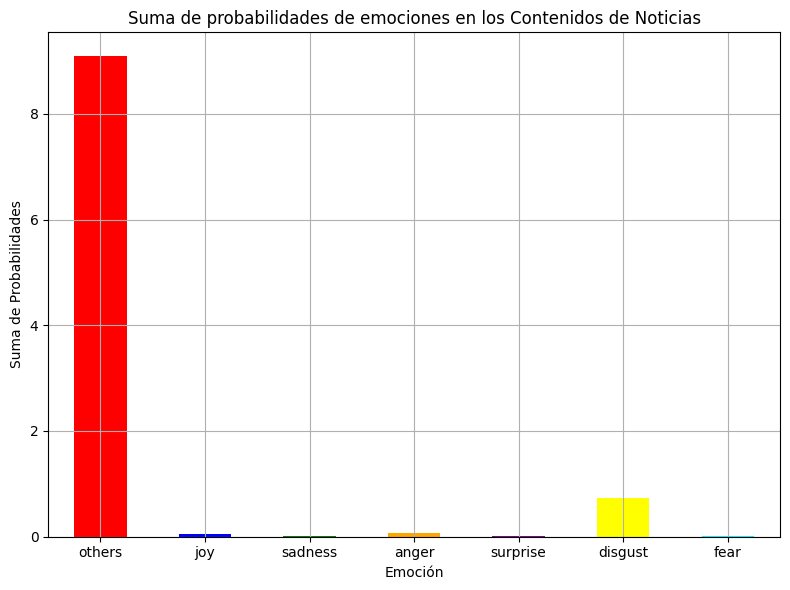

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que `contenido_limpio` contiene tus datos y `emotion_analyzer` es tu analizador de emociones

# Obtener las probabilidades de emociones para los primeros 10 contenidos
emociones = contenido_limpio.head(10).apply(lambda x: emotion_analyzer.predict(x).probas)

# Convertir la Serie de emociones a DataFrame
dfemocion = pd.DataFrame(list(emociones))

# Sumar las probabilidades de cada emoción para obtener la frecuencia total
suma_emociones = dfemocion.sum(axis=0)

# Preparar el gráfico de barras
plt.figure(figsize=(8, 6))
suma_emociones.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan'])

# Configuraciones del gráfico
plt.title('Suma de probabilidades de emociones en los Contenidos de Noticias')
plt.xlabel('Emoción')
plt.ylabel('Suma de Probabilidades')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()




Hate Speech




In [ ]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

config.json:   0%|          | 0.00/956 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

<Figure size 800x600 with 0 Axes>

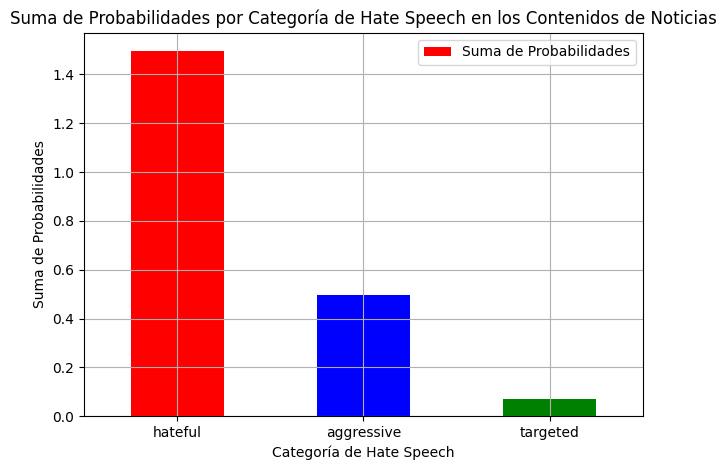

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que `contenido_limpio` contiene tus datos y `hate_speech_analyzer` es tu analizador de hate speech

# Obtener las salidas y probabilidades de hate speech para los primeros 10 contenidos
hates = contenido_limpio.head(10).apply(lambda x: hate_speech_analyzer.predict(x))

# Inicializar un diccionario para acumular las probabilidades por categoría
acumulado_probas = {'hateful': 0.0, 'targeted': 0.0, 'aggressive': 0.0}

# Sumar las probabilidades por categoría para todos los contenidos
for hate in hates:
    for categoria, probabilidad in hate.probas.items():
        acumulado_probas[categoria] += probabilidad

# Convertir el diccionario a DataFrame para el gráfico de barras
df_acumulado_probas = pd.DataFrame(list(acumulado_probas.items()), columns=['Categoria', 'Suma de Probabilidades'])

# Preparar el gráfico de barras
plt.figure(figsize=(8, 6))
df_acumulado_probas.sort_values(by='Suma de Probabilidades', ascending=False).plot(x='Categoria', y='Suma de Probabilidades', kind='bar', color=['red', 'blue', 'green'])

# Configuraciones del gráfico
plt.title('Suma de Probabilidades por Categoría de Hate Speech en los Contenidos de Noticias')
plt.xlabel('Categoría de Hate Speech')
plt.ylabel('Suma de Probabilidades')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

